In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from datetime import datetime

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GuldastaHajizadaPortfolioProjects/Online Retail.csv')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


# Data Preprocessing

In [4]:
data.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# Removing rows with missing CustomerID as they cannot be segmented

data.dropna(subset=['CustomerID'], inplace=True)

# Converting 'InvoiceDate' to datetime format

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Removing canceled transactions by filtering out invoices starting with 'C'

data = data[~data['InvoiceNo'].astype(str).str.startswith('C')]

# Creating a 'TotalAmount' column to represent the revenue per transaction

data['TotalAmount'] = data['Quantity'] * data['UnitPrice']

<ipython-input-6-839e57669dc9>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
<ipython-input-6-839e57669dc9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalAmount'] = data['Quantity'] * data['UnitPrice']


In [7]:
data.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
TotalAmount,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   TotalAmount  397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [9]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# Exploratory Data Analysis

In [10]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalAmount
count,397924.000000,397924,397924.000000,397924.000000,397924.000000
mean,13.021823,2011-07-10 23:43:36.912475648,3.116174,15294.315171,22.394749
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000,0.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.680000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,180.420210,NaN,22.096788,1713.169877,309.055588


<ipython-input-11-eebc891cde59>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data['TotalAmount'].resample('M').sum()


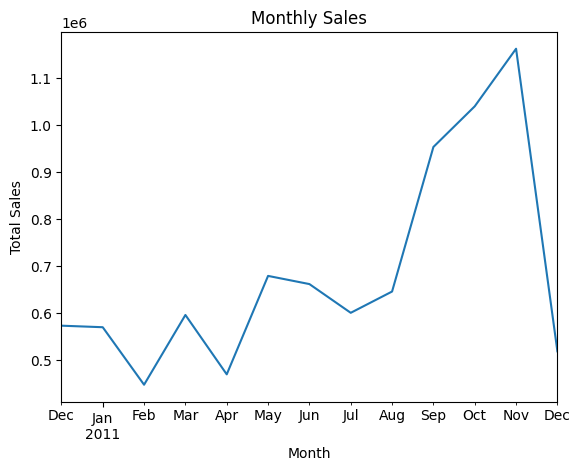

In [11]:
# Sales over time

data = data.set_index('InvoiceDate')
monthly_sales = data['TotalAmount'].resample('M').sum()

monthly_sales.plot(title="Monthly Sales", ylabel="Total Sales", xlabel="Month")
plt.show()

# Recency, Frequency, and Monetary (RFM) Segmentation

In [15]:
# Resetting the index so the InvoiceDate becomes a column again

data.reset_index(inplace=True)

In [16]:
# Preventing 0-day recency by adding 1 to the last invoice date
reference_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)

In [17]:
rfm = pd.DataFrame()

# Recency Calculation
# Difference in days between the last purchase date of each customer and the reference date

rfm['Recency'] = (reference_date - data.groupby('CustomerID')['InvoiceDate'].max()).dt.days

# Frequency Calculation
# Number of unique invoices (purchases) for each customer

rfm['Frequency'] = data.groupby('CustomerID')['InvoiceNo'].nunique()

# Monetary Calculation
# Summing up total spending for each customer

rfm['Monetary'] = data.groupby('CustomerID')['TotalAmount'].sum()

In [18]:
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


# RFM Scoring

In [19]:
# Calculating Recency, Frequency, and Monetary values for each customer

rfm['Recency'] = pd.cut(rfm['Recency'], bins=[-1, 30, 90, 180, 365, float('inf')], labels=[5, 4, 3, 2, 1])
rfm['Frequency'] = pd.cut(rfm['Frequency'], bins=[-1, 1, 3, 5, 10, float('inf')], labels=[1, 2, 3, 4, 5])
rfm['Monetary'] = pd.cut(rfm['Monetary'], bins=[-1, 100, 500, 1000, 5000, float('inf')], labels=[1, 2, 3, 4, 5])

In [20]:
# Overall Score Calculation
rfm['RFM_Score'] = rfm['Recency'].astype(int) + rfm['Frequency'].astype(int) + rfm['Monetary'].astype(int)

In [21]:
rfm[['Recency', 'Frequency', 'Monetary', 'RFM_Score']].head()

,Recency,Frequency,Monetary,RFM_Score
CustomerID,,,,
12346.0,2,1,5,8
12347.0,5,4,4,13
12348.0,4,3,4,11
12349.0,5,1,4,10
12350.0,2,1,2,5


# Customer Segmentation

In [22]:
# Fitting k-means clustering with 3 clusters

kmeans = KMeans(n_clusters=3, random_state=0)
rfm['Cluster'] = kmeans.fit_predict(rfm[['RFM_Score']])

In [23]:
rfm['Cluster'].value_counts()

,count
Cluster,
2,1469
0,1439
1,1431


# Visualisation

In [24]:
# Average RFM score per cluster
cluster_summary = rfm.groupby('Cluster')['RFM_Score'].mean()

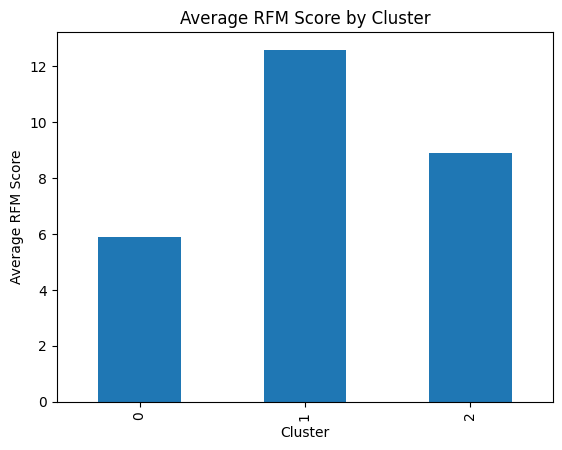

In [25]:
cluster_summary.plot(kind='bar', title='Average RFM Score by Cluster', ylabel='Average RFM Score', xlabel='Cluster')
plt.show()

# Insights and Recommendations

In [26]:
recommendations = {
    1: "High-value customers: Offer loyalty rewards, exclusive deals, or early access to new products.",
    2: "Regular customers: Encourage spending through promotions or bundle offers. Consider personalized recommendations.",
    0: "Low-value or infrequent customers: Use re-engagement strategies, like targeted discounts or reminders, to bring them back."
}


for cluster, action in recommendations.items():
    print(f"Cluster {cluster}: {action}")

Cluster 1: High-value customers: Offer loyalty rewards, exclusive deals, or early access to new products.
Cluster 2: Regular customers: Encourage spending through promotions or bundle offers. Consider personalized recommendations.
Cluster 0: Low-value or infrequent customers: Use re-engagement strategies, like targeted discounts or reminders, to bring them back.
